In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Read data
df = pd.read_csv('bank-full.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA

In [3]:
#encoding dependent variable using get_dummies

df.iloc[:,:-1] = pd.get_dummies(df.iloc[:,:-1])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,2143,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,no
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,no
2,33,2,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,no
3,47,1506,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,no
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,0,0,0,0,0,0,yes
45207,71,1729,17,456,2,-1,0,0,0,0,0,0,1,0,0,0,yes
45208,72,5715,17,1127,5,184,3,0,0,0,0,0,1,0,0,0,yes
45209,57,668,17,508,4,-1,0,0,1,0,0,0,0,0,0,0,no


In [4]:
#Encoding the independent variable
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['y'] = label.fit_transform(df['y'])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,2143,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0
2,33,2,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0
3,47,1506,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,0,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,0,0,1,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,0,0,1,0,0,0,1
45209,57,668,17,508,4,-1,0,0,1,0,0,0,0,0,0,0,0


In [5]:
#Checking the datatypes after encoding
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         uint8
contact      uint8
day          uint8
month        uint8
duration     uint8
campaign     uint8
pdays        uint8
previous     uint8
poutcome     uint8
y            int32
dtype: object

# Splitting data into training and testing

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#Splitting data into independent and dependent variables
x = df.iloc[:,:-1]
y = df['y']

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

# Model building

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lg = LogisticRegression()

In [11]:
#Train the model
lg.fit(xtrain,ytrain)

#Prediction
ypred = lg.predict(xtest)

# Model validation

In [12]:
print('Actual values: ', ytest[0:25].values)
print('Predicted values: ', ypred[:25])

Actual values:  [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0]
Predicted values:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [13]:
#printing the evaluation metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.57      0.17      0.27      1091

    accuracy                           0.88      9043
   macro avg       0.74      0.58      0.60      9043
weighted avg       0.86      0.88      0.86      9043



Text(50.722222222222214, 0.5, 'Predicted values')

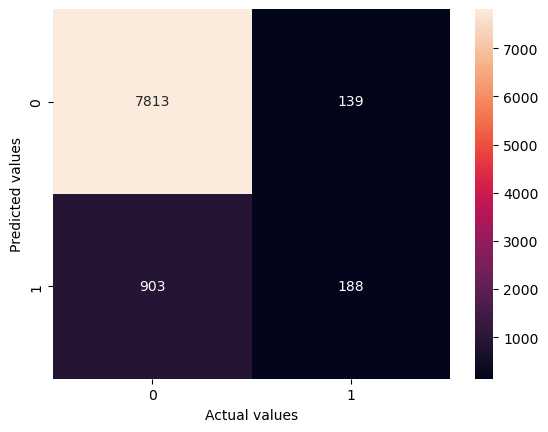

In [14]:
# Here we have to concentrate on recall values
# confusion matrix

sns.heatmap(confusion_matrix(ytest,ypred), annot=True, fmt='0.4g')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

# Threshold selection

In [15]:
proba = lg.predict_proba(xtest)[:,1]
proba

array([0.07556077, 0.05088613, 0.18490491, ..., 0.05726032, 0.07133857,
       0.07770717])

In [16]:
# we make of roc-auc curve for threshold selection

from sklearn.metrics import roc_auc_score, roc_curve

Area under curve(auc) should be high then model shows high accuracy

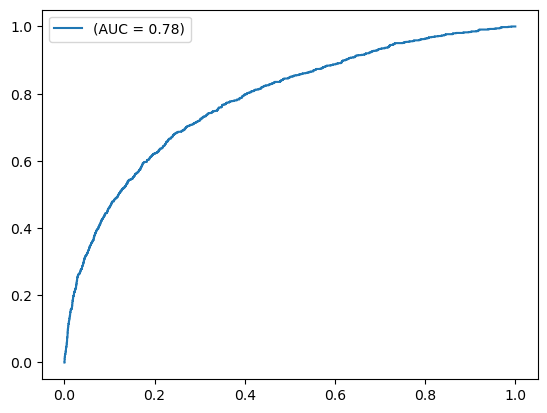

In [17]:
auc = roc_auc_score(ytest,proba)

fpr,tpr,threshold = roc_curve(ytest,proba)
plt.plot(fpr, tpr, label= '(AUC = %0.2f)'%auc)
plt.legend()

In [18]:
auc

0.7809388411126705

In [19]:
threshold

array([1.99956214e+00, 9.99562138e-01, 9.93058640e-01, ...,
       1.62841343e-04, 1.61699332e-04, 4.53641840e-09])

In [20]:
accuracy = []

for i in threshold:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))

In [22]:
accuracy

[0.8793541966161672,
 0.8793541966161672,
 0.879243613844963,
 0.8791330310737587,
 0.879243613844963,
 0.880128276014597,
 0.880128276014597,
 0.8805706070994139,
 0.8805706070994139,
 0.8804600243282097,
 0.8805706070994139,
 0.8804600243282097,
 0.8805706070994139,
 0.8805706070994139,
 0.8806811898706182,
 0.8809023554130266,
 0.8805706070994139,
 0.8804600243282097,
 0.8803494415570055,
 0.8804600243282097,
 0.8805706070994139,
 0.8806811898706182,
 0.8807917726418224,
 0.8807917726418224,
 0.8809023554130266,
 0.8807917726418224,
 0.8809023554130266,
 0.8807917726418224,
 0.8809023554130266,
 0.8807917726418224,
 0.8806811898706182,
 0.8807917726418224,
 0.8809023554130266,
 0.8811235209554351,
 0.8812341037266394,
 0.8811235209554351,
 0.8812341037266394,
 0.8812341037266394,
 0.8812341037266394,
 0.8813446864978436,
 0.8812341037266394,
 0.8811235209554351,
 0.8809023554130266,
 0.8809023554130266,
 0.8810129381842309,
 0.8814552692690479,
 0.8815658520402522,
 0.88167643481145

In [23]:
threshod_sel = pd.DataFrame({'Threshold': threshold
                             ,'Accuracy': accuracy})

In [24]:
threshod_sel

,Threshold,Accuracy
0,1.999562e+00,0.879354
1,9.995621e-01,0.879354
2,9.930586e-01,0.879244
3,9.906674e-01,0.879133
4,9.867116e-01,0.879244
...,...,...
1580,7.377652e-04,0.134469
1581,6.865152e-04,0.134358
1582,1.628413e-04,0.128387
1583,1.616993e-04,0.128276


In [25]:
#select the threshold value which shows high accuracy
threshod_sel.sort_values('Accuracy', ascending=False)

,Threshold,Accuracy
126,5.343481e-01,0.885989
128,5.331931e-01,0.885879
118,5.566789e-01,0.885879
120,5.555453e-01,0.885879
125,5.345414e-01,0.885879
...,...,...
1580,7.377652e-04,0.134469
1581,6.865152e-04,0.134358
1582,1.628413e-04,0.128387
1583,1.616993e-04,0.128276


In [26]:
from sklearn.preprocessing import binarize

In [27]:
#By keeping 0.5 as threshold we can get 88% accuracy
y = binarize([proba], threshold=0.5)[0]

By selecting the threshold we can able to increase the recall value 

In [28]:
print(classification_report(ytest,y))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.57      0.17      0.27      1091

    accuracy                           0.88      9043
   macro avg       0.74      0.58      0.60      9043
weighted avg       0.86      0.88      0.86      9043

